In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Make sure that caffe is on the python path:
caffe_root = '/usr/local/google/home/zyan/proj/caffe_private_recurrent_2d/'  # this file is expected to be in {caffe_root}/examples
import sys
sys.path.insert(0, caffe_root + 'python')

import caffe

# Set the right path to your model definition file, pretrained model weights,
# and the image you would like to classify.
MODEL_FILE = caffe_root+'examples/mnist_semantic_segmentation/lstm_2d_1_hidden_layer_model_deploy.prototxt'
PRETRAINED = caffe_root+'examples/mnist_semantic_segmentation/lstm_2d_1_hidden_layer/lstm_2d_1_hidden_layer_iter_300.caffemodel'

import os
from struct import *
import matplotlib.pyplot as plt


In [2]:
data_mean=np.zeros((1))
data_mean[0]=128

In [3]:
plt.imshow(im_pred_vis)caffe.set_mode_cpu()
net = caffe.Classifier(MODEL_FILE, PRETRAINED,
                       mean=data_mean,
                       image_dims=(28, 28))

In [4]:
test_img_data_file='/usr/local/google/home/zyan/data/mnist/t10k-images.idx3-ubyte'  
with open(test_img_data_file,'rb') as f:
    magic_num_str = f.read(4)
    magic_num = (unpack('>i',magic_num_str))[0]
    num_img_str = f.read(4)
    num_img = (unpack('>i',num_img_str))[0]
    num_row_str = f.read(4)
    num_row = (unpack('>i',num_row_str))[0]
    num_col_str = f.read(4)
    num_col = (unpack('>i',num_col_str))[0]  plt.imshow(im_pred_vis)
    pix_byte = f.read(num_img*num_row*num_col)
print 'num_img %d' % num_img
print 'num_row %d num_col %d' % (num_row, num_col)

num_img 10000
num_row 28 num_col 28


In [5]:
img_data=np.zeros((num_img, num_row, num_col, 3), dtype=np.uint8)
img_data_float=np.zeros((num_img, num_row, num_col, 1), dtype=np.single)
pix_c=0
for n in range(num_img):
    for h in range(num_row):
        for w in range(num_col):
            pix_val=(unpack('>B',pix_byte[pix_c]))[0]
            img_data[n,h,w,:]=pix_val
            img_data_float[n,h,w, 0]=pix_val
            pix_c+=1

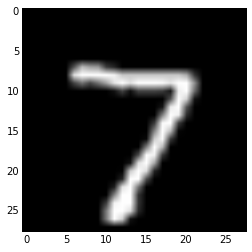

In [6]:
img_to_show = img_data[0,:,:,:]
plt.imshow(img_data[0,:,:,:])

In [15]:
prediction = net.predict([test_img_data])
print prediction.shape
prediction=prediction.reshape((11,28,28))
print prediction.shape
print prediction[:,14,14]

(1, 8624)
(11, 28, 28)
[ 0.08684477  0.06822672  0.08178516  0.0714895   0.08141632  0.08421802
  0.07883697  0.07219507  0.0798162   0.08327786  0.21189339]


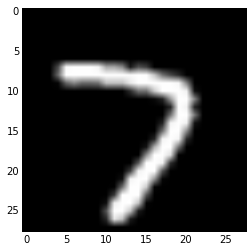

In [20]:
print pred_label.shape
pred_label_vis_img=np.zeros((28,28,3),dtype=np.uint8)
for ch in range(3):
    pred_label_vis_img[:,:,ch]=pred_label
plt.imshow(pred_label_vis_img)